# SOCIAL MEDIA SENTIMENTAL ANALYSIS USING TWITTER DATASET

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
config = pd.read_csv('./config.csv')

In [3]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [4]:
auth = tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit= True)

In [5]:
twitterAccount = input()

imVkohli


In [6]:
tweets  = tweepy.Cursor(twitterApi.user_timeline,
                        screen_name = twitterAccount,
                        count = None,
                        since_id = None,
                        max_id = None,trim_user = True,exclude_replies=True,
                        include_entities=False).items(100);

# Creating Dataframe

In [7]:
dataframe = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ['Tweet'])

In [8]:
dataframe.head()

,Tweet
0,WTF?! Keep Calm. 😎 It's the WROGN THROWAWAY FE...
1,The new all black Xtreme 160R ‘Stealth Edition...
2,Deeply saddened by the untimely demise of CDS ...
3,Once upon a time. 🚗🏍️💨\n#80skids #backintheday...
4,The passion runs within you.\nGo all out and b...


In [9]:
def cleanuptweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT : ','',text)
    text = re.sub(r'http?:\/\/[A-Za-z0-9\.\/]+','',text)
    return text

In [10]:
dataframe['Tweet'] = dataframe['Tweet'].apply(cleanuptweet) 

In [11]:
def gettextsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [12]:
def gettextpolarity(text):
    return TextBlob(text).sentiment.polarity

In [13]:
dataframe['Subjectivity'] = dataframe['Tweet'].apply(gettextsubjectivity)
dataframe['Polarity'] = dataframe['Tweet'].apply(gettextpolarity)

In [14]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity
0,WTF?! Keep Calm. 😎 It's the WROGN THROWAWAY FE...,0.712500,-0.237500
1,The new all black Xtreme 160R ‘Stealth Edition...,0.429293,-0.060101
2,Deeply saddened by the untimely demise of CDS ...,0.508333,-0.291667
3,Once upon a time. 🚗🏍️💨\n80skids backinthedays....,0.000000,0.000000
4,The passion runs within you.\nGo all out and b...,0.121429,-0.035714
...,...,...,...
95,🏋️🏋️‍♂️ https://t.co/Z6rkGcApPb,0.000000,0.000000
96,Happy birthday Bhajju Pa. \nGod bless you with...,0.600000,0.733333
97,This isn’t just a team. It’s a family. We move...,0.000000,0.000000
98,Happy father's day to all the father's all acr...,1.000000,0.900000


In [15]:
dataframe = dataframe.drop(dataframe[dataframe['Tweet']==''].index)

In [16]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity
0,WTF?! Keep Calm. 😎 It's the WROGN THROWAWAY FE...,0.712500,-0.237500
1,The new all black Xtreme 160R ‘Stealth Edition...,0.429293,-0.060101
2,Deeply saddened by the untimely demise of CDS ...,0.508333,-0.291667
3,Once upon a time. 🚗🏍️💨\n80skids backinthedays....,0.000000,0.000000
4,The passion runs within you.\nGo all out and b...,0.121429,-0.035714
...,...,...,...
95,🏋️🏋️‍♂️ https://t.co/Z6rkGcApPb,0.000000,0.000000
96,Happy birthday Bhajju Pa. \nGod bless you with...,0.600000,0.733333
97,This isn’t just a team. It’s a family. We move...,0.000000,0.000000
98,Happy father's day to all the father's all acr...,1.000000,0.900000


In [17]:
def gettextanalysis(a):
    if a<0 :
         return 'Negative'
    elif a==0 :
         return 'Neutral'
    else:
         return 'Positive'

In [18]:
dataframe['Score'] = dataframe['Polarity'].apply(gettextanalysis) 

In [19]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity,Score
0,WTF?! Keep Calm. 😎 It's the WROGN THROWAWAY FE...,0.712500,-0.237500,Negative
1,The new all black Xtreme 160R ‘Stealth Edition...,0.429293,-0.060101,Negative
2,Deeply saddened by the untimely demise of CDS ...,0.508333,-0.291667,Negative
3,Once upon a time. 🚗🏍️💨\n80skids backinthedays....,0.000000,0.000000,Neutral
4,The passion runs within you.\nGo all out and b...,0.121429,-0.035714,Negative
...,...,...,...,...
95,🏋️🏋️‍♂️ https://t.co/Z6rkGcApPb,0.000000,0.000000,Neutral
96,Happy birthday Bhajju Pa. \nGod bless you with...,0.600000,0.733333,Positive
97,This isn’t just a team. It’s a family. We move...,0.000000,0.000000,Neutral
98,Happy father's day to all the father's all acr...,1.000000,0.900000,Positive


In [20]:
Positive = dataframe[dataframe['Score']=='Positive']
print(str(Positive.shape[0]/(dataframe.shape[0])*100)+ '% of positive tweets')
p=Positive.shape[0]/dataframe.shape[0]*100

56.00000000000001% of positive tweets


In [21]:
Negative = dataframe[dataframe['Score']=='Negative']
print(str(Negative.shape[0]/(dataframe.shape[0])*100)+ '% of negative tweets')
n=Negative.shape[0]/dataframe.shape[0]*100

9.0% of negative tweets


In [22]:
Neutral = dataframe[dataframe['Score']=='Neutral']
print(str(Neutral.shape[0]/(dataframe.shape[0])*100)+ '% of neutral tweets')
ne=Neutral.shape[0]/dataframe.shape[0]*100

35.0% of neutral tweets


In [23]:
Explore = (0,0.2,0)
Labels = 'Positive','Negative','Neutral'
size=[p,n,ne]
colours = ['greenyellow', 'orange' , 'gold']

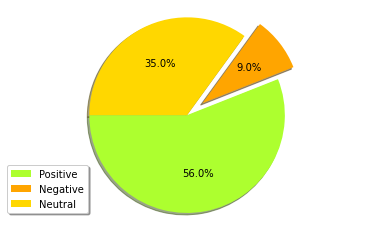

In [24]:
plt.pie(size,explode = Explore,colors = colours,autopct='%1.1f%%',startangle=180, shadow = True)
plt.legend(Labels, loc= (-0.05,0.05) , shadow = True)
plt.axis('equal')
plt.savefig('Sentimental_Analysis.png')

<BarContainer object of 3 artists>

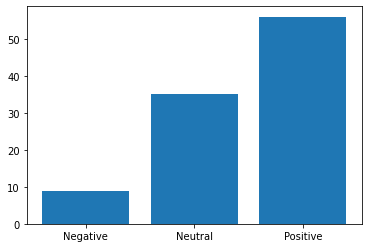

In [25]:
Labels = dataframe.groupby('Score').count().index.values
values = dataframe.groupby('Score').size().values
plt.bar(Labels,values)

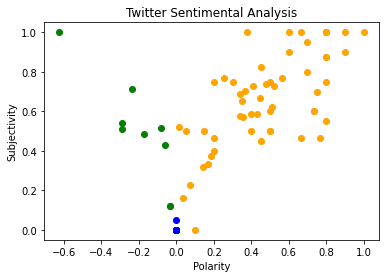

In [26]:
for index,row in dataframe.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'orange')
    if row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'green')
    if row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'blue')
plt.title('Twitter Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel("Subjectivity")
plt.show()

# SENTIMENTAL ANALYSIS